# EDA Continued: Challenge Set 1 Review, Data Checking & Cleaning with Pandas and Viz Tools

Aka, learning how to always expect your data to have more problems.

**Learning Goals**:

1. Review core pandas methods and understand their application to challenge set 1
2. Understand basic methods for data quality checking and cleaning 
3. See examples of how to use visualization as an aid in exploring data quality 

In [174]:
from __future__ import print_function, division

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

%matplotlib inline

In [176]:
import datetime

#### Exercise 1.1

- Open up a new IPython notebook
- Download a few MTA turnstile data files
- Read them into a pandas dataframe (pd.read_csv()), format the columns nicely, and display the first few rows.

#Pickle code to save df#

In [177]:
#turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]

In [178]:
#turnstiles_df.columns

In [179]:
# Three weeks of Data
#turnstiles_df.DATE.value_counts().sort_index()


#### Exercise 1.2

- Let's turn this into a time series. Create a new column that stores the date and time as a single pandas datetime object.

In [180]:
#turnstiles_df.columns

In [181]:
from datetime import datetime as dt

In [182]:
#df_exits = pd.read_csv('mta1.csv')
df_exits = pd.read_csv('mta2.csv')

In [183]:
df_exits.head(3)

,Unnamed: 0,C/A,UNIT,SCP,STATION,DATE,DATE_TIME,EXITS,PREV_DATE,PREV_EXITS,DAILY_EXITS
0,1,A002,R051,02-00-00,59 ST,08/27/2016,2016-08-27 04:00:00,1966044,08/27/2016,1966041.0,3.0
1,2,A002,R051,02-00-00,59 ST,08/27/2016,2016-08-27 08:00:00,1966079,08/27/2016,1966044.0,35.0
2,3,A002,R051,02-00-00,59 ST,08/27/2016,2016-08-27 12:00:00,1966155,08/27/2016,1966079.0,76.0


In [184]:
df_exits.groupby(['STATION']).DAILY_EXITS.mean().sort_values(ascending = False)

STATION
JFK JAMAICA CT1    947.996203
NORWOOD 205 ST     916.318363
HOWARD BCH JFK     799.470968
GROVE STREET       473.646085
225 ST             352.992063
BEDFORD AV         349.502077
59 ST COLUMBUS     346.809450
14 ST-UNION SQ     339.432055
1 AV               331.633871
LACKAWANNA         323.871456
191 ST             321.549902
ROCKAWAY AV        317.207043
BERGEN ST          314.459316
W 4 ST-WASH SQ     308.646960
CITY / BUS         305.875606
YORK ST            305.791005
CANAL ST           301.272888
LEXINGTON AV/63    290.730769
VERNON-JACKSON     287.773423
GRD CNTRL-42 ST    287.322418
82 ST-JACKSON H    285.902967
NEWKIRK PLAZA      282.900800
MYRTLE AV          279.823413
30 AV              275.714470
34 ST-HERALD SQ    270.854015
WESTCHESTER SQ     268.343915
FLUSHING-MAIN      267.186968
ASTORIA DITMARS    265.425595
181 ST             260.782699
PAVONIA/NEWPORT    260.362319
                      ...    
JACKSON AV          30.270866
AVENUE J            30.012720
17

In [185]:
df_exits.STATION.value_counts()

34 ST-PENN STA     12494
FULTON ST          12113
23 ST               8925
GRD CNTRL-42 ST     7940
CANAL ST            7362
34 ST-HERALD SQ     6987
CHAMBERS ST         6852
59 ST               6723
86 ST               6528
42 ST-PORT AUTH     6521
TIMES SQ-42 ST      6261
WALL ST             6214
ATL AV-BARCLAY      6121
125 ST              5509
14 ST               5382
59 ST COLUMBUS      5185
14 ST-UNION SQ      4798
96 ST               4714
28 ST               4694
161/YANKEE STAD     4675
CHURCH AV           4628
JAY ST-METROTEC     4580
47-50 STS ROCK      4557
METS-WILLETS PT     4536
50 ST               4496
LEXINGTON AV/53     4088
CORTLANDT ST        3797
BOWLING GREEN       3629
BOROUGH HALL        3442
FLUSHING-MAIN       3407
                   ...  
182-183 STS          378
65 ST                377
KOSCIUSZKO ST        375
BOWERY               375
INTERVALE AV         375
BROAD CHANNEL        375
CHAUNCEY ST          375
GATES AV             375
BURKE AV             375


In [186]:
df_exits.dtypes

Unnamed: 0       int64
C/A             object
UNIT            object
SCP             object
STATION         object
DATE            object
DATE_TIME       object
EXITS            int64
PREV_DATE       object
PREV_EXITS     float64
DAILY_EXITS    float64
dtype: object

In [187]:
# Challenge 4
%matplotlib inline
df_RO79 = df_exits[df_exits['UNIT'] == 'R079']
df_RO79.head(3)

,Unnamed: 0,C/A,UNIT,SCP,STATION,DATE,DATE_TIME,EXITS,PREV_DATE,PREV_EXITS,DAILY_EXITS
1496,1509,A006,R079,00-00-00,5 AV/59 ST,08/27/2016,2016-08-27 06:00:00,4184886,08/27/2016,4184854.0,32.0
1497,1510,A006,R079,00-00-00,5 AV/59 ST,08/27/2016,2016-08-27 10:00:00,4185197,08/27/2016,4184886.0,311.0
1498,1511,A006,R079,00-00-00,5 AV/59 ST,08/27/2016,2016-08-27 14:00:00,4185671,08/27/2016,4185197.0,474.0


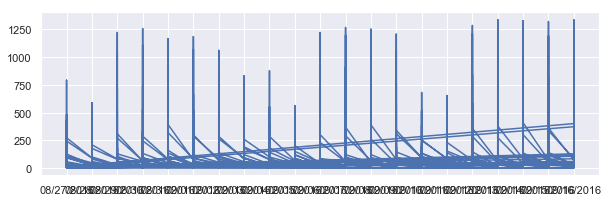

In [188]:
# Challenge 4
dates = df_RO79['DATE']
counts = df_RO79['DAILY_EXITS']
plt.figure(figsize=(10,3))
plt.plot(dates,counts)

In [189]:
# Challenge 5 Group by CA, Unit & STATION
df_exits.groupby(['C/A','UNIT','STATION']).sum().head(3)

,,,Unnamed: 0,EXITS,PREV_EXITS,DAILY_EXITS
C/A,UNIT,STATION,,,,
A002,R051,59 ST,1127998,4013544859,4.013363e+09,181578.0
A006,R079,5 AV/59 ST,2012000,4075428713,4.075270e+09,159012.0
A007,R079,5 AV/59 ST,2190132,1439929447,1.439844e+09,85223.0


In [190]:
# Challenge 6
df_exits.groupby(['STATION','DATE']).sum()['DAILY_EXITS']

STATION    DATE      
1 AV       08/27/2016    12567.0
           08/28/2016    15717.0
           08/29/2016    18982.0
           08/30/2016    19715.0
           08/31/2016    20518.0
           09/01/2016    20084.0
           09/02/2016    21131.0
           09/03/2016    15465.0
           09/04/2016    13530.0
           09/05/2016    13112.0
           09/06/2016    20073.0
           09/07/2016    21216.0
           09/08/2016    23496.0
           09/09/2016    24297.0
           09/10/2016    19089.0
           09/11/2016    16543.0
           09/12/2016    19796.0
           09/13/2016    22817.0
           09/14/2016    24395.0
           09/15/2016    23968.0
           09/16/2016    24715.0
103 ST     08/27/2016    10537.0
           08/28/2016    11785.0
           08/29/2016    19362.0
           08/30/2016    20772.0
           08/31/2016    19796.0
           09/01/2016    20392.0
           09/02/2016    20199.0
           09/03/2016    13577.0
           09/04/2016

In [191]:
# Challenge 7
gct = df_exits[df_exits['STATION'] == 'GRD CNTRL-42 ST']
gct.head(3)

,Unnamed: 0,C/A,UNIT,SCP,STATION,DATE,DATE_TIME,EXITS,PREV_DATE,PREV_EXITS,DAILY_EXITS
436689,440164,R236,R045,00-00-00,GRD CNTRL-42 ST,08/27/2016,2016-08-27 05:00:00,1330528,08/27/2016,1330521.0,7.0
436690,440165,R236,R045,00-00-00,GRD CNTRL-42 ST,08/27/2016,2016-08-27 09:00:00,1330659,08/27/2016,1330528.0,131.0
436691,440166,R236,R045,00-00-00,GRD CNTRL-42 ST,08/27/2016,2016-08-27 13:00:00,1331043,08/27/2016,1330659.0,384.0


In [192]:
# challenge 7
gct.groupby(['DATE']).DAILY_EXITS.sum()

DATE
08/27/2016     47945.0
08/28/2016     45325.0
08/29/2016    127822.0
08/30/2016    136231.0
08/31/2016    136245.0
09/01/2016    137070.0
09/02/2016    119701.0
09/03/2016     57463.0
09/04/2016     48174.0
09/05/2016     44659.0
09/06/2016    135895.0
09/07/2016    143054.0
09/08/2016    144673.0
09/09/2016    139195.0
09/10/2016     61448.0
09/11/2016     43270.0
09/12/2016    134661.0
09/13/2016    143761.0
09/14/2016    148405.0
09/15/2016    146324.0
09/16/2016    140019.0
Name: DAILY_EXITS, dtype: float64

Text(0.5,0,'DATE')

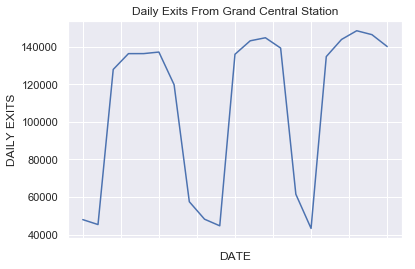

In [193]:
# Challenge 7
gct.groupby(['DATE']).DAILY_EXITS.sum().plot()
plt.title('Daily Exits From Grand Central Station')
plt.ylabel('DAILY EXITS')
plt.xlabel('DATE')

In [194]:
gct.dtypes

Unnamed: 0       int64
C/A             object
UNIT            object
SCP             object
STATION         object
DATE            object
DATE_TIME       object
EXITS            int64
PREV_DATE       object
PREV_EXITS     float64
DAILY_EXITS    float64
dtype: object

In [195]:
#import datetime
gct['DATE'] = pd.to_datetime(gct['DATE'])

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [196]:
gct.dtypes

Unnamed: 0              int64
C/A                    object
UNIT                   object
SCP                    object
STATION                object
DATE           datetime64[ns]
DATE_TIME              object
EXITS                   int64
PREV_DATE              object
PREV_EXITS            float64
DAILY_EXITS           float64
dtype: object

In [197]:
gct['day_of_week'] = gct['DATE'].dt.day_name()

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [198]:
gct.head(3)

,Unnamed: 0,C/A,UNIT,SCP,STATION,DATE,DATE_TIME,EXITS,PREV_DATE,PREV_EXITS,DAILY_EXITS,day_of_week
436689,440164,R236,R045,00-00-00,GRD CNTRL-42 ST,2016-08-27,2016-08-27 05:00:00,1330528,08/27/2016,1330521.0,7.0,Saturday
436690,440165,R236,R045,00-00-00,GRD CNTRL-42 ST,2016-08-27,2016-08-27 09:00:00,1330659,08/27/2016,1330528.0,131.0,Saturday
436691,440166,R236,R045,00-00-00,GRD CNTRL-42 ST,2016-08-27,2016-08-27 13:00:00,1331043,08/27/2016,1330659.0,384.0,Saturday


In [199]:
gct.groupby(['DATE','day_of_week']).DAILY_EXITS.sum()
#gct.groupby(['DATE','day_of_week'])

DATE        day_of_week
2016-08-27  Saturday        47945.0
2016-08-28  Sunday          45325.0
2016-08-29  Monday         127822.0
2016-08-30  Tuesday        136231.0
2016-08-31  Wednesday      136245.0
2016-09-01  Thursday       137070.0
2016-09-02  Friday         119701.0
2016-09-03  Saturday        57463.0
2016-09-04  Sunday          48174.0
2016-09-05  Monday          44659.0
2016-09-06  Tuesday        135895.0
2016-09-07  Wednesday      143054.0
2016-09-08  Thursday       144673.0
2016-09-09  Friday         139195.0
2016-09-10  Saturday        61448.0
2016-09-11  Sunday          43270.0
2016-09-12  Monday         134661.0
2016-09-13  Tuesday        143761.0
2016-09-14  Wednesday      148405.0
2016-09-15  Thursday       146324.0
2016-09-16  Friday         140019.0
Name: DAILY_EXITS, dtype: float64

In [200]:
#grouped = df.groupby(['A', 'B'], as_index=False)
day = pd.DataFrame(gct.groupby(['DATE','day_of_week'], as_index = False).DAILY_EXITS.sum())
day.head(23)

,DATE,day_of_week,DAILY_EXITS
0,2016-08-27,Saturday,47945.0
1,2016-08-28,Sunday,45325.0
2,2016-08-29,Monday,127822.0
3,2016-08-30,Tuesday,136231.0
4,2016-08-31,Wednesday,136245.0
5,2016-09-01,Thursday,137070.0
6,2016-09-02,Friday,119701.0
7,2016-09-03,Saturday,57463.0
8,2016-09-04,Sunday,48174.0
9,2016-09-05,Monday,44659.0


In [201]:
#day.columns =['DATE','day_of_week','DAILY_EXITS']
day.columns

Index([u'DATE', u'day_of_week', u'DAILY_EXITS'], dtype='object')

In [202]:
day.dtypes

DATE           datetime64[ns]
day_of_week            object
DAILY_EXITS           float64
dtype: object

In [203]:
criteria = day['day_of_week'] == 'Monday'
criteria

0     False
1     False
2      True
3     False
4     False
5     False
6     False
7     False
8     False
9      True
10    False
11    False
12    False
13    False
14    False
15    False
16     True
17    False
18    False
19    False
20    False
Name: day_of_week, dtype: bool

In [204]:
type(criteria)

pandas.core.series.Series

In [205]:
print(list(criteria))

[False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False]


In [206]:
criteria2 = list(criteria)
hug = []
print(type(criteria2))
for idx in range(len(criteria2)):
    if criteria2[idx] == True:
        hug.append(idx)
hug

<type 'list'>


[2, 9, 16]

In [207]:
week_list = []
for item in hug:
    
    l = []
    if item + 7 < len(day.DAILY_EXITS):
        for idx in range(item,item+7):
            print(day['DAILY_EXITS'][idx])
            l.append(day['DAILY_EXITS'][idx])
        week_list.append(l)
    #print(day['DAILY_EXITS'][item])
    


127822.0
136231.0
136245.0
137070.0
119701.0
57463.0
48174.0
44659.0
135895.0
143054.0
144673.0
139195.0
61448.0
43270.0


In [208]:
week_list

[[127822.0, 136231.0, 136245.0, 137070.0, 119701.0, 57463.0, 48174.0],
 [44659.0, 135895.0, 143054.0, 144673.0, 139195.0, 61448.0, 43270.0]]

In [209]:
print(len(week_list))

2


In [210]:
for item in week_list:
    print(len(item))

7
7


Text(0.5,0,'Day of Week')

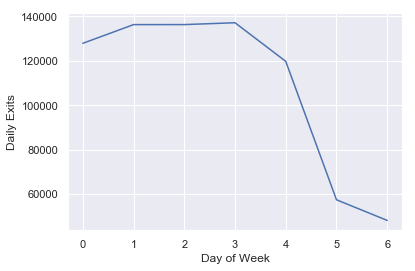

In [211]:
plt.plot(week_list[0])
plt.ylabel('Daily Exits')
plt.xlabel('Day of Week')

Text(0.5,0,'Day of Week')

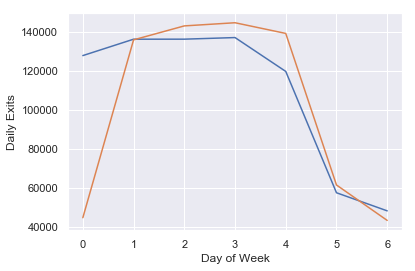

In [212]:
plt.plot(week_list[0])
plt.plot(week_list[1])
plt.ylabel('Daily Exits')
plt.xlabel('Day of Week')

In [213]:
# Challenge 9
df_exits.groupby(['STATION']).sum()['DAILY_EXITS'].sort_values(ascending = False)

STATION
34 ST-PENN STA     2507555.0
GRD CNTRL-42 ST    2281340.0
CANAL ST           2217971.0
34 ST-HERALD SQ    1892457.0
59 ST COLUMBUS     1798207.0
14 ST-UNION SQ     1628595.0
HOWARD BCH JFK     1610934.0
TIMES SQ-42 ST     1610372.0
86 ST              1549959.0
23 ST              1548625.0
FULTON ST          1317098.0
42 ST-PORT AUTH    1292401.0
JFK JAMAICA CT1    1248511.0
125 ST             1128933.0
59 ST              1102284.0
GROVE STREET       1058599.0
47-50 STS ROCK      988638.0
CHAMBERS ST         930258.0
14 ST               921428.0
NORWOOD 205 ST      918151.0
FLUSHING-MAIN       910306.0
96 ST               884050.0
LACKAWANNA          833969.0
BERGEN ST           827028.0
72 ST               823790.0
28 ST               808953.0
CITY / BUS          757348.0
W 4 ST-WASH SQ      736123.0
LEXINGTON AV/53     702194.0
50 ST               696828.0
                     ...    
E 143/ST MARY'S      19154.0
55 ST                18668.0
BRONX PARK EAST      17213.0
215 ST

In [214]:
# Challenge 10
total_ridership_counts = df_exits.groupby(['STATION']).sum()['DAILY_EXITS']
type(total_ridership_counts)

pandas.core.series.Series

(array([283.,  49.,  15.,  11.,   4.,   2.,   5.,   2.,   1.,   2.]),
 array([      0. ,  250755.5,  501511. ,  752266.5, 1003022. , 1253777.5,
        1504533. , 1755288.5, 2006044. , 2256799.5, 2507555. ]),
 <a list of 10 Patch objects>)

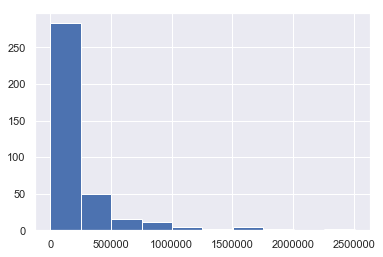

In [215]:
# Challenge 10
plt.hist(total_ridership_counts)

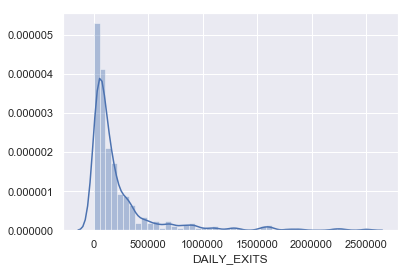

In [216]:
# Challenge 10
sns.distplot(total_ridership_counts)

In [217]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

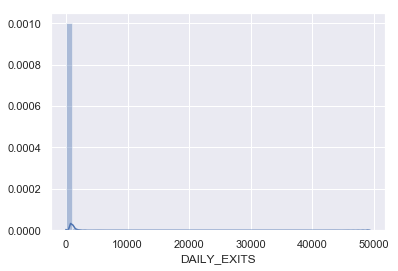

In [218]:
sns.distplot(df_exits['DAILY_EXITS']
             [df_exits['DAILY_EXITS'] < 50000])

Alternatively, pandas is so good that it can even automatically parse datetimes as you load in data if you tell it to, as below.

### Now let's run some diagnostics on the data and see approaches to cleaning before tackling exercise 3

We can isolate specific turnstiles by creating boolean series masks, then using them to index into the dataframe: 

* Looks to be a incorrect AUD entry.  May be we should just select the Regular One.

* Since we are only interested in Entries, we might be OK.

* No more duplicate Entries

#### Exercise 1.3

- These counts are for every n hours (What is n?). Also, there's something odd about these "counts", what is it? Do they actually represent total entries for a time period, or something else? We want total daily entries, create a new dataframe with one row per turnstile/day and a column that gives total daily entries.

### Next, let's look at some more weirdness in the data and think about handling it before we finalize our daily count column

* Counter working in Reverse??? - WHHHAT

In [219]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
#_ = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)#

In [220]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
#turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

In [221]:
# Verify that we got same results via the non-pandas version.

## Bonus: EDA Visualizations & Viz Review

So we've gotten the data into a cleaner state, but are all the issues really resolved? It's a good idea to do some sanity checking at the turnstile level, but also at the **station level**. Here we'll see a couple of good/standard EDA approaches applied to this data, that leverage plots to better understand what we're working with.

Do we get results we'd expect based on our domain knowledge of NYC, and can we detect anything else that's clearly an anomaly?

First, let's look at the distribution of daily entries for turnstiles to check that it's sensible. What type of plot can we use? 

## Bonus Solutions

In [222]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

### Distribution of turnstile daily entries

In [223]:
#sns.distplot(turnstiles_daily['DAILY_ENTRIES']
             #[turnstiles_daily['DAILY_ENTRIES'] < 50000])

This is a right-skewed distribution (the mean is to the right of the median). It's good that there are no values less than 0 now, but it seems there are still entry values that are likely too extreme to be sensible. 

### Distribution of daily entries by station, for top 10 stations by volume

Two key things we should notice from these quick EDA steps:

- Using our knowledge of NYC, it **doesn't seem right that these are the top 10 stations**. Some are reasonable like grand central and times square, but is 23rd street really that popular? A next step here would be to dig into turnstiles in "23 ST" (hint: check the line names for different instances of 23 ST, is it really one station?) 


- There's still a **clear outlier in daily traffic for Canal St**, we should be able to figure out what's causing this by digging into it. Maybe our cleaning process is not quite enough yet (1 million is too large a cutoff!)